<a href="https://colab.research.google.com/github/suzanagomes/Data-Vikings---WebScraping/blob/main/Aula_Relat%C3%B3rio_em_pdf_com_o_uso_de_API_YAHOO_FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  👩‍💻 Relatório em pdf com o uso de API : YAHOO FINANCE

Importando as bibliotecas

In [3]:
# Instalar esses pacotes
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Libs necessarias


# Pacotes analise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Analises gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Função para data
from datetime import datetime

# YFiance
import yfinance as yf
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

## **API Yahoo Finance**
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças .

In [5]:
# Coletando os dados: Dados = web.get_data_yahoo( 'Ticker', period='y' )
Dados = web.get_data_yahoo( 'PETR4.SA', period='1y' )
Dados1 = web.get_data_yahoo( 'VALE3.SA', period='1y' )
Dados2 = web.get_data_yahoo( 'AMER3.SA', period='1y' )

# Shape
Dados.shape
Dados1.shape
Dados2.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(252, 6)

In [6]:
# VErificando
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981434,65689000
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244415,65811600
2022-02-17,32.849998,33.290001,32.549999,32.799999,19.168444,43255200
2022-02-18,32.570000,33.090000,32.270000,33.000000,19.285326,60304700


In [7]:
# Ultimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300
2023-02-10,25.980000,26.790001,25.930000,26.719999,26.719999,54683100
2023-02-13,26.690001,26.889999,26.370001,26.799999,26.799999,36726900
2023-02-14,26.850000,27.059999,26.600000,26.680000,26.680000,27623300


In [8]:
# Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.890437,30.425556,29.348929,29.901468,23.453564,8.163384e+07
std,3.666866,3.685120,3.621055,3.648414,3.525626,3.704524e+07
min,21.000000,22.110001,20.770000,21.469999,17.537956,2.762330e+07
25%,26.842500,27.492500,26.167500,26.797500,20.123456,5.608975e+07
50%,30.605000,31.264999,29.965000,30.535000,23.396103,7.266555e+07
75%,32.700001,33.454999,32.297501,32.937500,26.086003,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [9]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-14 to 2023-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## **Média Móvel**
A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa.

E como fazer esse cálculo?
<br>
Basta utilizar a fórmula:
MMA = Soma dos preços de fechamento ÷ Número de dias 

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são: <br> 11,12,13,14,15,16 e 17.
<br>

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13 <br>
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14 <br>
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15

In [10]:
# Media Simples
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [11]:
Media( Lista )

14

In [12]:
# Periodo da média móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')


0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


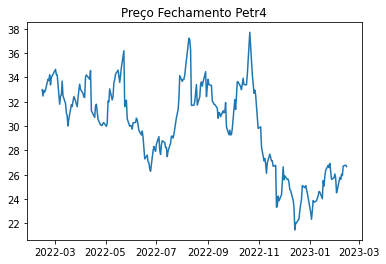

In [13]:
# Plot
plt.plot( Dados['Close'] )
plt.title('Preço Fechamento Petr4');

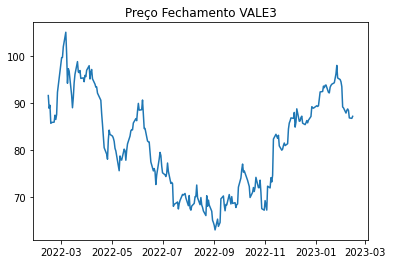

In [14]:
# Plot
plt.plot( Dados1['Close'] )
plt.title('Preço Fechamento VALE3');

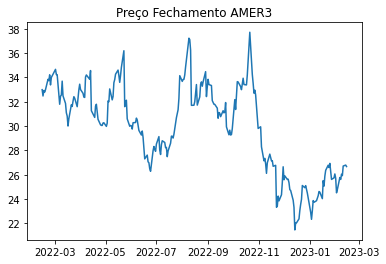

In [15]:
# Plot
plt.plot( Dados['Close'] )
plt.title('Preço Fechamento AMER3');

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

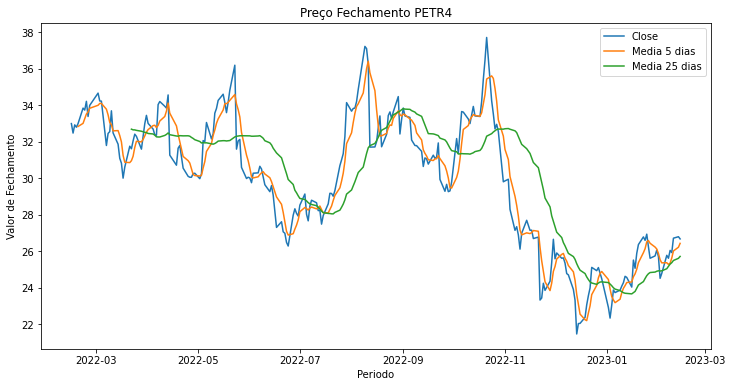

In [16]:
from pandas.core import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados['Close'] )
plt.plot( Dados['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento PETR4')
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

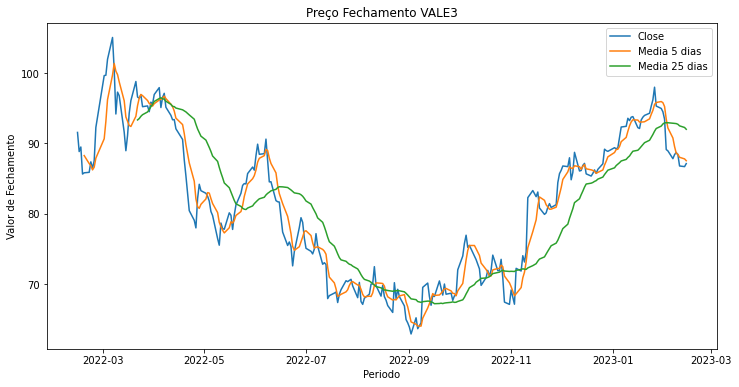

In [17]:
from pandas.core import window
Periodo = 5
Dados1['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados1['Close'] )
plt.plot( Dados1['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados1['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento VALE3')
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

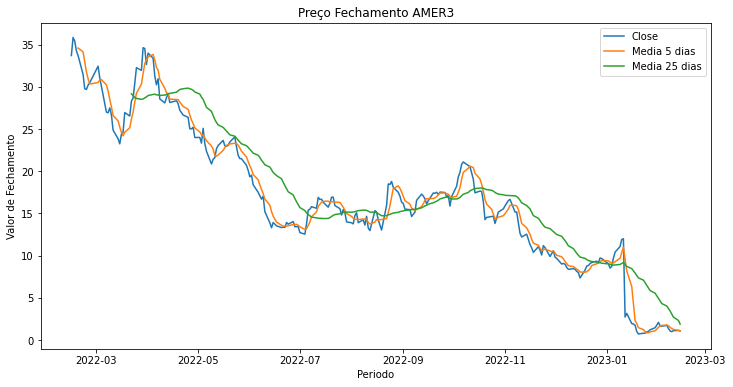

In [18]:
from pandas.core import window
Periodo = 5
Dados2['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados2['Close'] )
plt.plot( Dados2['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados2['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento AMER3')
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

## **Plotly**

O PLOTLY é uma biblioteca Python de plotagem 
interativa e de código aberto que oferece suporte a 
mais de 40 tipos de gráficos exclusivos, abrangendo 
uma ampla variedade de casos de uso estatísticos, 
financeiros, geográficos, científicos e 
tridimensionais.

**plotly.express (px)** é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.<br>
**plotly.graph_objects (go)** é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [19]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento Petr4'
)

Figure.show()

In [20]:
Periodo = 5
Dados1['Media_Movel'] = Dados1['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados1,
    y='Close',
    title='Fechamento Vale3'
)

Figure.show()

In [21]:
Periodo = 5
Dados2['Media_Movel'] = Dados2['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados2,
    y='Close',
    title='Fechamento Amer3'
)

Figure.show()

In [22]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

In [23]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados1.index,
        y=Dados1['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento Vale3',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

In [24]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados2.index,
        y=Dados2['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento Amer3',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

## **Candlestick Charts**
<br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

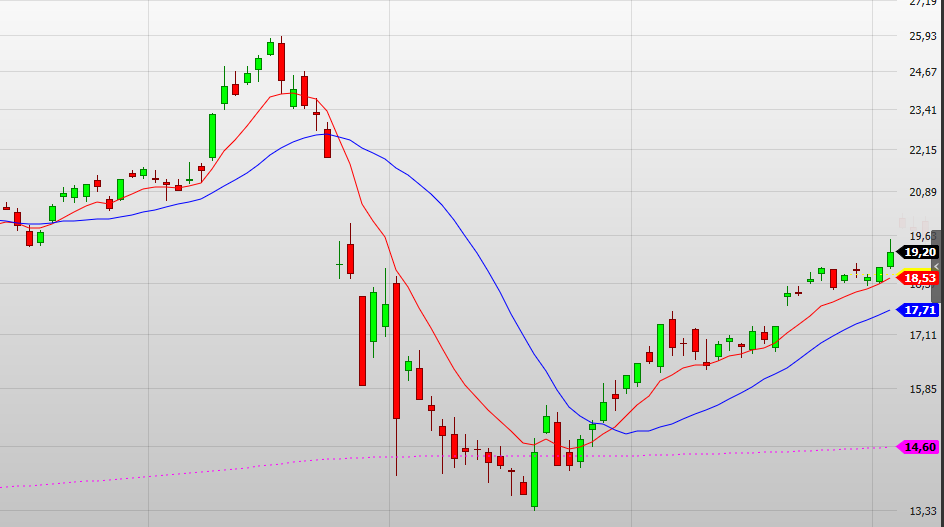

In [25]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento PETR4',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

In [26]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados1.index,
            open=Dados1['Open'],
            high=Dados1['High'],
            low=Dados1['Low'],
            close=Dados1['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento VALE3',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

In [27]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados2.index,
            open=Dados2['Open'],
            high=Dados2['High'],
            low=Dados2['Low'],
            close=Dados2['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento AMER3',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

## **Criando Relátorio**

PETR4

In [39]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Análises avançadas</b> <br>Follow-up Petrobras <br>Por Suzana Gomes'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='gold')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='Por Suzana Gomes',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

VALE3

In [29]:
# Criar a Figura
Figura1 = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura1.update_layout(
    width=1000,
    height=800,
    title_text='<b>Análises avançadas</b> <br>Follow-up Vale <br>Por Suzana Gomes'
)

# Adicionado um gráfico na 1º Posição
Figura1.add_trace(
    go.Candlestick(
        x=Dados1.index,
        open=Dados1['Open'],
        high=Dados1['High'],
        low=Dados1['Low'],
        close=Dados1['Close'],
        increasing_line_color='#fe5df9',
        decreasing_line_color='#74a4f8'
    ),
    row=1, col=1
)

Figura1.add_trace(
    go.Scatter(
        x=Dados1.index,
        y=Dados1['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='#66d3f0')
    ),
    row=1, col=1
)

Figura1.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura1.add_trace(
    go.Scatter(
        x=Dados1.index,
        y=Dados1['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='#74a4f8')
    ),
    row=2, col=1
)

Figura1.add_trace(
    go.Scatter(
        x=Dados1.index,
        y=Dados1['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='#fe5df9')
    ),
    row=2, col=1
)

Figura1.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura1.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura1.add_annotation(
    showarrow=False,
    text='Por Suzana Gomes',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura1.show()

AMER3

In [34]:
# Criar a Figura
Figura2 = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura2.update_layout(
    width=1000,
    height=800,
    title_text='<b>Análises avançadas</b> <br>Follow-up Americanas <br>Por Suzana Gomes'
)

# Adicionado um gráfico na 1º Posição
Figura2.add_trace(
    go.Candlestick(
        x=Dados2.index,
        open=Dados2['Open'],
        high=Dados2['High'],
        low=Dados2['Low'],
        close=Dados2['Close'],
        increasing_line_color='#ad69fc',
        decreasing_line_color='#82f2e5'
    ),
    row=1, col=1
)

Figura2.add_trace(
    go.Scatter(
        x=Dados2.index,
        y=Dados2['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='#ffcfa1')
    ),
    row=1, col=1
)

Figura2.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura2.add_trace(
    go.Scatter(
        x=Dados2.index,
        y=Dados2['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='#82f2e5')
    ),
    row=2, col=1
)

Figura2.add_trace(
    go.Scatter(
        x=Dados2.index,
        y=Dados2['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='#ad69fc')
    ),
    row=2, col=1
)

Figura2.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura2.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura2.add_annotation(
    showarrow=False,
    text='Por Suzana Gomes',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura2.show()

## **Exportando PDF**

**Kaleido** <br>
Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [31]:
# Reiniciei o servidor

In [41]:
#!pip install -U kaleido
#Após instalar, colocar como comentário e restart runtime

In [40]:
Figura.write_image('Report_Financeiro_PETR4.pdf')

In [36]:
Figura1.write_image('Report_Financeiro_VALE3.pdf')

In [37]:
Figura2.write_image('Report_Financeiro_AMER3.pdf')